## Library Import

In [1]:
## Loading of Libraries. Please install requirements.txt if there's an error.
import pandas_gbq
import pandas as pd
from os.path import exists
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

/home/juan/heytempo/virtualenv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Data Loading

In [2]:
if not exists("df_train.df"):
    query = """
    SELECT *
    FROM data_science_take_home.census_income_learn
    """
    df = pandas_gbq.read_gbq(
    query,
    project_id="heytempo-public",
    )
    df.to_csv("df_train.df")

df=pd.read_csv("df_train.df")
df

,Unnamed: 0,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,label
0,0,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
1,1,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
2,2,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,3,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
4,4,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,Poland,?,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,199518,85,Not in universe,0,0,5th or 6th grade,0,Not in universe,Widowed,Not in universe or children,...,?,?,?,Foreign born- Not a citizen of U S,0,Not in universe,2,0,94,- 50000.
199519,199519,86,Not in universe,0,0,High school graduate,0,Not in universe,Divorced,Not in universe or children,...,?,?,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
199520,199520,90,Private,43,26,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Education,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199521,199521,90,Not in universe,0,0,Bachelors degree(BA AB BS),0,Not in universe,Married-spouse absent,Not in universe or children,...,?,?,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.


In [3]:
if not exists("df_test.df"):
    query = """
    SELECT *
    FROM data_science_take_home.census_income_test
    """
    df = pandas_gbq.read_gbq(
    query,
    project_id="heytempo-public",
    )
    df.to_csv("df_train.df")

df_test=pd.read_csv("df_test.df")
df_test

,Unnamed: 0,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,label
0,0,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
1,1,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
2,2,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,Dominican-Republic,Mexico,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,3,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
4,4,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99757,99757,80,Not in universe,0,0,10th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
99758,99758,83,Private,24,12,Some college but no degree,0,Not in universe,Divorced,Manufacturing-nondurable goods,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
99759,99759,87,Not in universe,0,0,10th grade,0,Not in universe,Widowed,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
99760,99760,90,Not in universe,0,0,5th or 6th grade,0,Not in universe,Widowed,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.


<AxesSubplot:xlabel='label', ylabel='Count'>

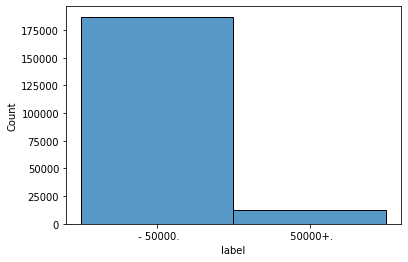

In [4]:
##Check our label distribution, quite uneven.
sns.histplot(data=df, x="label")

## Data transformations

In [5]:
## Changing the label. 
## Having two spaces preceding a string is just evil.
## I normally like 1 and -1 as binary labels but xgboost will complain
## later if I use that. 
df['label']=df['label'].replace(" - 50000.",0)
df['label']=df['label'].replace(" 50000+.",1)
df_test['label']=df_test['label'].replace(" - 50000.",0)
df_test['label']=df_test['label'].replace(" 50000+.",1)


### I checked a few correlations  but it didn't seem like there were a lot of them between features.

### Age is clearly an important variable
#### Age also clearly comes from two different polls, one that has options for "0,5,10,15 etc" I would probably put it in bins but we don't kwow what the specific question is, so there's no way to determine if "25" means 25-29 or 21-25 so I will leave it as is

<AxesSubplot:xlabel='age', ylabel='Count'>

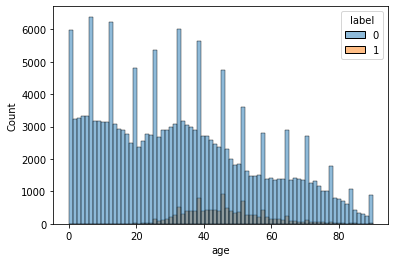

In [6]:
sns.histplot(data=df, x="age",hue="label")

### It looks like most people who earn over 50k work 52 weeks, not surprising.

<AxesSubplot:xlabel='weeks_worked_in_year', ylabel='Density'>

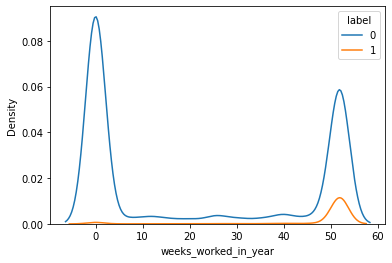

In [7]:
sns.kdeplot(data=df, x="weeks_worked_in_year",hue="label")


### No surprise that children earn less than 50k :)

<AxesSubplot:xlabel='Count', ylabel='education'>

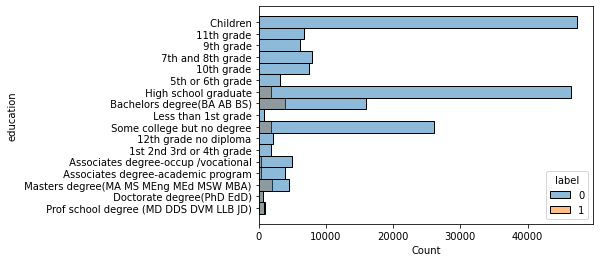

In [8]:
sns.histplot(data=df, y="education",hue="label")

In [9]:
df[df["wage_per_hour"]>0]["wage_per_hour"].value_counts()
## There is so few data points here here that I was tempted to just 
## remove it

500     734
600     546
700     534
800     507
1000    386
       ... 
574       1
897       1
728       1
1851      1
2626      1
Name: wage_per_hour, Length: 1239, dtype: int64

### What's cheap and quick? just drop all non-numerical data.

In [10]:
df_num=df._get_numeric_data()
X=df_num.loc[:, df_num.columns!='label'].values
Y=df_num.loc[:, df_num.columns=='label'].values

### Everything seems fair, even using a large validation set this seems ok, 95% accurate. Nice.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X, Y.ravel())
clf.score(X_test, y_test)

0.9511965919057762

### After 10 fold cross validation, something funny is going on, clearly a few of the predictors are quite wrong, while others achieve good performance.

In [12]:
cross_val_score(RandomForestClassifier(max_depth=9, random_state=0), X, Y.ravel(),cv=10)

array([0.93795419, 0.56913747, 0.39623114, 0.6776263 , 0.7040397 ,
       0.94426624, 0.94281275, 0.91845429, 0.93950481, 0.9402065 ])

### Even checking against the full test dataset (not the one we made for training) the results seem fine. weird.

In [13]:
df_num_test=df_test._get_numeric_data()
X_val=df_num_test.loc[:, df_num_test._get_numeric_data().columns!='label'].values
Y_val=df_num_test.loc[:, df_num_test._get_numeric_data().columns=='label'].values
clf.score(X_val, Y_val)


0.9475652051883483

### Gonna shake it

In [14]:
## probably not the best way to ramdomise a dataset, but I want to
## keep the dataframe functionality instead of just having a numpy 
## array.

df_shake=df_num.iloc[np.random.permutation(len(df_num))]
X_shake=df_shake.loc[:, df_shake.columns!='label'].values
Y_shake=df_shake.loc[:, df_shake.columns=='label'].values

### The problem is gone, all folds have similar accuracy now. This means some sort of sequentiallity in the dataset.

In [15]:
cross_val_score(RandomForestClassifier(max_depth=9, random_state=0), X_shake, Y_shake.ravel(),cv=10)

array([0.94988222, 0.94862928, 0.9495314 , 0.94957899, 0.95048115,
       0.94877706, 0.94962911, 0.94952887, 0.94947875, 0.94792502])

### I bet that that the 50k's are all together somehow.

<AxesSubplot:xlabel='Unnamed: 0', ylabel='label'>

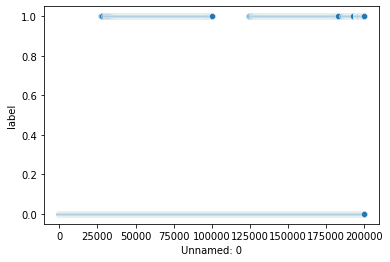

In [16]:
sns.scatterplot(data=df, x="Unnamed: 0",y="label")
## I was mistaken

### Maybe it's ordered by age?
### A-ha! so I'm guessing these values actually come from 3 different censuses. By not randomising, I was clearly dropping some important datapoints from each fold. The test and train set in each fold were too different because of this sequencing.

<AxesSubplot:xlabel='Unnamed: 0', ylabel='age'>

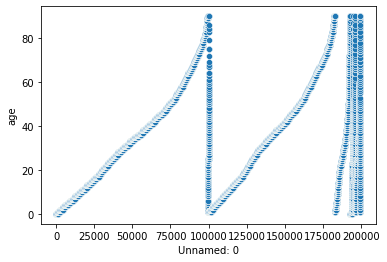

In [17]:
sns.scatterplot(data=df, x="Unnamed: 0",y="age")


### Let's try my favourite fast non-parallel algorithm see if we can squeeze an extra percentage point for accuracy (looks like we can get half one)

In [18]:
cross_val_score(XGBClassifier(use_label_encoder=False,eval_metric="error"), X_shake, Y_shake.ravel())


array([0.95308859, 0.9541912 , 0.95439168, 0.95461608, 0.95331295])

### Looks like it works on the test dataset too. Cool.

In [19]:
## I also tried a bunch of different parameters but none that made any significant difference, including the tree
## method, regularization weights, etc. 


model = XGBClassifier(use_label_encoder=False,eval_metric="logloss")
model.fit(X_shake, Y_shake.ravel())
y_pred = model.predict(X_test)
model.score(X_val, Y_val.ravel())

0.9539504019566568

## Let's try to add the education as a one hot encoded variable

In [20]:
education_ohe=pd.get_dummies(df.education, prefix='Education')
df_ohe=pd.concat([df, education_ohe], axis=1)
df_ohe_num=df_ohe._get_numeric_data()

X_ohe=df_ohe_num.loc[:, df_ohe_num.columns!='label'].values
Y_ohe=df_ohe_num.loc[:, df_ohe_num.columns=='label'].values
model_ohe = XGBClassifier(use_label_encoder=False,eval_metric="logloss")
model_ohe.fit(X_ohe, Y_ohe.ravel())



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

## An extra 1% accuracy in the validation set. Very nice. 

In [21]:

education_test_ohe=pd.get_dummies(df_test.education, prefix='Education')
df_ohe_test=pd.concat([df_test, education_test_ohe], axis=1)
df_ohe_test_num=df_ohe_test._get_numeric_data()

X_ohe_val=df_ohe_num.loc[:, df_ohe_test_num.columns!='label'].values
Y_ohe_val=df_ohe_num.loc[:, df_ohe_test_num.columns=='label'].values


model_ohe.score(X_ohe_val, Y_ohe_val.ravel())

0.9620494880289491

### We can "business speak" it and say that we reduced inaccuracies by 21%

In [24]:
(1-0.9539)/(1-0.9620)

1.2131578947368418